In [2]:
!pip3 install boto3


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
!pip3 install s3fs

  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.2/390.2 kB 13.8 MB/s eta 0:00:00
Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 22.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.10.0
    Uninstalling fsspec-2023.10.0:
      Successfully uninstalled fsspec-2023.10.0
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.39
    Uninstalling botocore-1.34.39:
      Successfully uninstalled botocore-1.34.39

[notice] A new release of pip is available: 24.1 -> 24.1.1
[no

In [4]:
import boto3
import pandas as pd
s3 = boto3.client('s3')

In [7]:
# # please do not share any access keys
# s3 = boto3.resource(
#     service_name='s3',
#     region_name='us-east-1',
#     aws_access_key_id='*********',
#     aws_secret_access_key='**************'
# )


In [8]:
# Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)

capstone-clv
data603output
flipkart-data


In [ ]:
for obj in s3.Bucket('capstone-clv').objects.all():
    print(obj)

s3.ObjectSummary(bucket_name='capstone-clv', key='AutoInsurance.csv')


In [ ]:
# To Upload a file in s3 buckect use the below code
# s3.Bucket('capstone-clv').upload_file(Filename='', Key='')

# for obj in s3.Bucket('krishtest1').objects.all():
#    print(obj)

In [9]:
obj = s3.Bucket('capstone-clv').Object('AutoInsurance.csv').get()
df = pd.read_csv(obj['Body'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
import pandas as pd
import numpy as np

In [12]:
df.shape

(9134, 24)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [14]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [15]:
df.columns =[x.lower() for x in df.columns]

In [16]:
df.columns = df.columns.str.replace(' ', '_')

In [17]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [18]:
df.to_csv('data.csv', index=False)

In [19]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

/var/folders/c0/f1s_z1s10db9z5zsf0wzj1yw0000gn/T/ipykernel_66667/3937611957.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [31]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-10-02,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-12-02,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-06-02,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-03-02,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [32]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(include=['number'])

In [33]:
df_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [34]:
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

encoding categorical

In [27]:
from sklearn.preprocessing import LabelEncoder

In [35]:
df_cat.drop(['customer'],axis=1,inplace=True)

In [36]:
df_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [37]:
for col in df_cat:
  le = LabelEncoder()
  le.fit(df_cat[col])
  df_cat[col] =le.transform(df_cat[col])
df_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1


In [38]:
df_cat['state'].unique()

array([4, 0, 2, 1, 3])

In [39]:
df_final =pd.concat([df_num,df_cat],axis=1)
df_final.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,4,0,...,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,4,0,1,2,1,5,2,0,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2,0,...,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,4,1,1,1,0,1,0,2,3,1
4,2813.692575,43836,73,12,44,0,1,138.130879,4,0,...,1,1,0,2,1,3,0,0,0,1


In [41]:
!pip3 install statsmodels


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [42]:
import statsmodels.api as sm

In [43]:
X = df_final.drop(columns=['customer_lifetime_value'],axis=1)
y =df_final['customer_lifetime_value']
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     customer_lifetime_value   R-squared:                       0.165
Model:                                 OLS   Adj. R-squared:                  0.163
Method:                      Least Squares   F-statistic:                     85.81
Date:                     Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                             21:31:25   Log-Likelihood:                -92835.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9112   BIC:                         1.859e+05
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           531.5725    473.375      1.123      0.261    -396.349    1459.494
income                            0.0022      0.003      0.669      0.504      -0.004       0.009
monthly_premium_auto             82.6770      2.925     28.270      0.000      76.944      88.410
months_since_last_claim           6.7966      6.546      1.038      0.299      -6.036      19.629
months_since_policy_inception    -0.7811      2.373     -0.329      0.742      -5.433       3.871
number_of_open_complaints      -247.8781     72.360     -3.426      0.001    -389.719    -106.037
number_of_policies               63.2701     27.663      2.287      0.022       9.044     117.496
total_claim_amount               -0.5824      0.362     -1.609      0.108      -1.292       0.127
state                            28.4756     51.117      0.557      0.577     -71.726     128.677
response                       -448.3788    192.408     -2.330      0.020    -825.541     -71.217
coverage                       -183.7890    113.701     -1.616      0.106    -406.669      39.091
education                        93.0832     47.790      1.948      0.051      -0.597     186.763
employmentstatus               -106.4348     73.604     -1.446      0.148    -250.715      37.845
gender                         -144.5589    132.636     -1.090      0.276    -404.556     115.438
location_code                   103.5590    116.578      0.888      0.374    -124.961     332.079
marital_status                 -237.2764    110.660     -2.144      0.032    -454.195     -20.358
policy_type                     448.5882    291.059      1.541      0.123    -121.953    1019.130
policy                          -47.9853     86.264     -0.556      0.578    -217.082     121.112
renew_offer_type               -348.5079     68.493     -5.088      0.000    -482.770    -214.245
sales_channel                    23.5601     62.295      0.378      0.705     -98.551     145.672
vehicle_class                    46.4930     32.422      1.434      0.152     -17.060     110.047
vehicle_size                    186.6798    123.372      1.513      0.130     -55.157     428.517
==============================================================================
Omnibus:                     5665.297   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64590.396
Skew:                           2.852   Prob(JB):                         0.00
Kurtosis:                      14.713   Cond. No.                     3.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] 

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif =[variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]}, index=X.columns)

,vif
income,2.262285
monthly_premium_auto,2.340932
months_since_last_claim,1.005291
months_since_policy_inception,1.014031
number_of_open_complaints,1.003197
number_of_policies,1.010664
total_claim_amount,2.556664
state,1.001755
response,1.050177
coverage,1.285413


### Model building

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X =df_final.drop(['customer_lifetime_value','policy_type','policy'],axis=1)
y = df_final['customer_lifetime_value']
y= np.log(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 19)
(6393,)
(2741, 19)
(2741,)


In [49]:
X_test

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size
708,74585,106,1,49,0,1,218.598065,1,0,0,3,1,1,0,1,1,0,3,1
47,23218,71,7,10,0,4,447.793440,3,0,0,3,1,0,1,2,3,0,5,1
3995,94903,94,3,38,0,1,451.200000,3,1,1,1,1,0,1,1,1,0,5,2
1513,77153,99,3,27,1,5,355.641958,1,0,1,1,1,0,2,1,0,1,0,1
3686,23769,69,18,14,0,2,470.097411,4,0,0,3,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,86096,108,30,1,0,1,518.400000,3,0,2,3,1,1,1,1,1,2,5,0
7923,0,122,15,47,0,9,650.521790,4,1,1,4,4,0,1,2,0,1,4,1
5633,85609,136,22,17,0,1,652.800000,0,0,1,2,1,0,1,1,1,0,3,1
8432,0,71,12,55,0,3,150.878447,3,0,0,3,4,1,0,1,1,2,5,0


## **Ridge and Lasso Regression**

In [50]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [51]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print('Ridge Regression')

y_pred =ridge.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared:', r2_score(y_test, y_pred))

Ridge Regression
RMSE: 0.5810690838130587
R-Squared: 0.24490043544447815


In [52]:
print(f'R^2 score for train: {ridge.score(X_train, y_train)}')
print(f'R^2 score for test: {ridge.score(X_test, y_test)}')

R^2 score for train: 0.2498261391140899
R^2 score for test: 0.24490043544447815


In [53]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('lasso Repression')

y_pred =lasso.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared:', r2_score(y_test, y_pred))

lasso Repression
RMSE: 0.5992937645386806
R-Squared: 0.19679167777854623


In [54]:
print(f'R^2 score for train: {lasso.score(X_train, y_train)}')
print(f'R^2 score for test: {lasso.score(X_test, y_test)}')

R^2 score for train: 0.1950367516366417
R^2 score for test: 0.19679167777854623


## **Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train, y_train)
print('Decision Tree regressor')

y_pred =dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred) )
print('R-Squared:', r2_score(y_test, y_pred))

Decision Tree regressor
RMSE: 0.26078138686341046
MAE: 0.10236061415572233
R-Squared: 0.8479095787263874


In [56]:
print(f'R^2 score for train: {dt.score(X_train, y_train)}')
print(f'R^2 score for test: {dt.score(X_test, y_test)}')

R^2 score for train: 1.0
R^2 score for test: 0.8479095787263874


## **Random Forest Regressor**

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
print('Random Forest regressor')
y_pred = rf.predict(X_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred) )
print('R-Squared:', r2_score(y_test, y_pred))

Random Forest regressor
RMSE: 0.2056758841734698
MAE: 0.0923388172996589
R-Squared: 0.9053947086516911


In [59]:
print(f'R^2 score for train: {rf.score(X_train, y_train)}')
print(f'R^2 score for test: {rf.score(X_test, y_test)}')

R^2 score for train: 0.9828742032067649
R^2 score for test: 0.9053947086516911


In [60]:
X_test

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size
708,74585,106,1,49,0,1,218.598065,1,0,0,3,1,1,0,1,1,0,3,1
47,23218,71,7,10,0,4,447.793440,3,0,0,3,1,0,1,2,3,0,5,1
3995,94903,94,3,38,0,1,451.200000,3,1,1,1,1,0,1,1,1,0,5,2
1513,77153,99,3,27,1,5,355.641958,1,0,1,1,1,0,2,1,0,1,0,1
3686,23769,69,18,14,0,2,470.097411,4,0,0,3,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,86096,108,30,1,0,1,518.400000,3,0,2,3,1,1,1,1,1,2,5,0
7923,0,122,15,47,0,9,650.521790,4,1,1,4,4,0,1,2,0,1,4,1
5633,85609,136,22,17,0,1,652.800000,0,0,1,2,1,0,1,1,1,0,3,1
8432,0,71,12,55,0,3,150.878447,3,0,0,3,4,1,0,1,1,2,5,0


In [61]:
single_test = X_test[1:2]

In [62]:
single_test

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size
47,23218,71,7,10,0,4,447.79344,3,0,0,3,1,0,1,2,3,0,5,1


In [63]:
sp =[23218,	71,	7,	10,	0,	4,	447.79344,	3,	0,	0,	3,	1	,0,1,	2,	3,	0,	5,	1]

In [64]:

y_pred_test = rf.predict([sp])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [65]:
np.exp(y_pred_test)

array([5408.40479367])

In [66]:
df_final.iloc[47]

customer_lifetime_value           5514.344018
income                           23218.000000
monthly_premium_auto                71.000000
months_since_last_claim              7.000000
months_since_policy_inception       10.000000
number_of_open_complaints            0.000000
number_of_policies                   4.000000
total_claim_amount                 447.793440
state                                3.000000
response                             0.000000
coverage                             0.000000
education                            3.000000
employmentstatus                     1.000000
gender                               0.000000
location_code                        1.000000
marital_status                       2.000000
policy_type                          1.000000
policy                               4.000000
renew_offer_type                     3.000000
sales_channel                        0.000000
vehicle_class                        5.000000
vehicle_size                      

In [67]:
df.iloc[47]

customer                                      XM45289
state                                          Oregon
customer_lifetime_value                   5514.344018
response                                           No
coverage                                        Basic
education                        High School or Below
effective_to_date                 2011-02-01 00:00:00
employmentstatus                             Employed
gender                                              F
income                                          23218
location_code                                Suburban
marital_status                                 Single
monthly_premium_auto                               71
months_since_last_claim                             7
months_since_policy_inception                      10
number_of_open_complaints                           0
number_of_policies                                  4
policy_type                             Personal Auto
policy                      

In [68]:
df[df['sales_channel'] == 'Web']

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
34,SK67821,Oregon,4932.916345,No,Basic,Bachelor,2011-02-13,Employed,F,37260,...,42,0,8,Corporate Auto,Corporate L1,Offer3,Web,15.437681,Four-Door Car,Medsize
37,DM79012,Oregon,7380.976717,No,Extended,Master,2011-06-02,Employed,F,65706,...,86,0,8,Personal Auto,Personal L3,Offer2,Web,436.800000,Four-Door Car,Small
51,PY51963,California,33473.349460,Yes,Basic,Bachelor,2011-11-01,Employed,F,33190,...,95,0,2,Corporate Auto,Corporate L1,Offer1,Web,508.800000,SUV,Medsize
65,SM52139,Washington,2930.693543,No,Basic,College,2011-01-31,Employed,M,33663,...,71,0,1,Personal Auto,Personal L3,Offer3,Web,350.400000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093,CC93587,California,5926.385440,No,Basic,College,2011-01-26,Employed,M,92949,...,84,0,3,Personal Auto,Personal L1,Offer2,Web,337.305815,Two-Door Car,Medsize
9095,IC80537,California,2580.849899,Yes,Basic,College,2011-09-02,Employed,M,46900,...,59,0,1,Corporate Auto,Corporate L2,Offer2,Web,316.800000,Four-Door Car,Medsize
9107,UU42868,California,5619.689084,Yes,Premium,High School or Below,2011-01-26,Unemployed,M,0,...,5,0,1,Corporate Auto,Corporate L2,Offer2,Web,1027.000029,SUV,Medsize
9120,RN61682,California,2114.738469,No,Basic,Bachelor,2011-02-19,Unemployed,F,0,...,69,5,1,Personal Auto,Personal L2,Offer3,Web,518.400000,Four-Door Car,Medsize


### Export model

In [69]:
import sklearn

print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.3.2


In [70]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [71]:
import pickle

In [72]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))

### Import the model

In [75]:
loaded_model = joblib.load('random_forest_model.pkl')


predictions = loaded_model.predict([sp])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [76]:
np.exp(predictions)

array([5408.40479367])

## **Hyperparameter Tuning of RF**

In [77]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
    'max_depth' : [10,20,30],
    'n_estimators' : [100,200,50],
    'bootstrap' : [True, False],
    'max_features' : ['auto','sqrt','log2']
}
grid = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs= -1, return_train_score= True)
grid.fit(X,y)
grid.best_params_

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packages

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 200}

In [78]:
rf = RandomForestRegressor(**grid.best_params_)
rf.fit(X_train, y_train)
print('Random Forest regressor with hyperparameter tuning\n')
y_pred = rf.predict(X_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred) )
print('R-Squared:', r2_score(y_test, y_pred))

Random Forest regressor with hyperparameter tuning

RMSE: 0.20561887269861906
MAE: 0.10066488342155516
R-Squared: 0.9054471488265186


## **Adaboost**


In [79]:
from sklearn.ensemble import AdaBoostRegressor

In [80]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5, criterion='squared_error'),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [81]:
y_pred = adaboost.predict(X_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred) )
print('R-Squared:', r2_score(y_test, y_pred))

RMSE: 0.21977896806870326
MAE: 0.1306639675668775
R-Squared: 0.8919758291797597


In [82]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
number_of_policies,0.595813
monthly_premium_auto,0.139613
total_claim_amount,0.059641
vehicle_class,0.037623
income,0.022825
months_since_policy_inception,0.022720
months_since_last_claim,0.021507
coverage,0.021503
renew_offer_type,0.009725
education,0.009202


## **Neural Network**

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
df_final.columns


Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [ ]:
X =df_final.drop(['customer_lifetime_value','policy_type','policy'],axis=1)
y = df_final['customer_lifetime_value']
y= np.log(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 19)
(6393,)
(2741, 19)
(2741,)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03,6.393000e+03
mean,1.439313e-16,1.016966e-16,-4.834758e-17,1.333726e-17,3.056456e-18,-7.335495e-17,3.112028e-17,-2.445165e-17,-6.613060e-17,4.709721e-17,-4.167895e-17,-1.000295e-16,1.667158e-18,-1.550457e-16,5.112618e-17,-9.780660e-17,-6.057341e-17,1.111439e-18,-1.000295e-17
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-1.248424e+00,-9.368124e-01,-1.493306e+00,-1.722989e+00,-4.163683e-01,-8.279002e-01,-1.486927e+00,-1.365340e+00,-4.045158e-01,-7.336204e-01,-1.134736e+00,-1.349118e+00,-9.806348e-01,-1.621451e+00,-1.747962e+00,-9.579951e-01,-1.031349e+00,-9.143952e-01,-2.032658e+00
25%,-9.063899e-01,-7.341904e-01,-8.999498e-01,-8.612784e-01,-4.163683e-01,-8.279002e-01,-5.530743e-01,-5.827850e-01,-4.045158e-01,-7.336204e-01,-1.134736e+00,-6.032766e-01,-9.806348e-01,2.970164e-02,-1.738360e-01,-9.579951e-01,-1.031349e+00,-9.143952e-01,-1.685377e-01
50%,-1.245130e-01,-3.000005e-01,-1.088083e-01,4.324504e-04,-4.163683e-01,-4.110814e-01,-1.842918e-01,-5.827850e-01,-4.045158e-01,-7.336204e-01,-4.076996e-01,-6.032766e-01,-9.806348e-01,2.970164e-02,-1.738360e-01,3.141729e-02,-9.677572e-02,-9.143952e-01,-1.685377e-01
75%,8.138387e-01,4.525952e-01,7.812260e-01,8.262387e-01,-4.163683e-01,4.225564e-01,3.835089e-01,9.823251e-01,-4.045158e-01,7.950742e-01,1.046372e+00,8.884067e-01,1.019748e+00,2.970164e-02,1.400291e+00,1.020830e+00,8.377971e-01,1.018077e+00,-1.685377e-01
max,2.059779e+00,5.894442e+00,1.967938e+00,1.831568e+00,5.002692e+00,2.506651e+00,8.404177e+00,1.764880e+00,2.472091e+00,2.323769e+00,1.773408e+00,1.634248e+00,1.019748e+00,1.680855e+00,1.400291e+00,2.010242e+00,1.772370e+00,1.501195e+00,1.695582e+00


In [ ]:
# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               2560      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
from tensorflow import keras


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(19,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # No activation function for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 17089 (66.75 KB)
Trainable params: 17089 (66.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
180/180 [==============================] - 2s 4ms/step - loss: 11.2947 - mae: 2.5126 - val_loss: 1.4803 - val_mae: 0.9619
Epoch 2/100
180/180 [==============================] - 1s 3ms/step - loss: 3.4646 - mae: 1.4940 - val_loss: 1.1175 - val_mae: 0.8323
Epoch 3/100
180/180 [==============================] - 1s 4ms/step - loss: 2.9489 - mae: 1.3776 - val_loss: 1.0007 - val_mae: 0.7904
Epoch 4/100
180/180 [==============================] - 1s 4ms/step - loss: 2.6805 - mae: 1.3099 - val_loss: 0.7289 - val_mae: 0.6562
Epoch 5/100
180/180 [==============================] - 1s 4ms/step - loss: 2.4107 - mae: 1.2410 - val_loss: 0.7349 - val_mae: 0.6632
Epoch 6/100
180/180 [==============================] - 1s 5ms/step - loss: 2.2416 - mae: 1.1944 - val_loss: 0.6485 - val_mae: 0.6215
Epoch 7/100
180/180 [==============================] - 1s 3ms/step - loss: 2.2845 - mae: 1.2057 - val_loss: 0.6779 - val_mae: 0.6378
Epoch 8/100
180/180 [==============================] - 1s 3ms/step -

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
#print("Test MAE:", mae)

86/86 [==============================] - 0s 3ms/step - loss: 0.0875
Test Loss: 0.08749955147504807


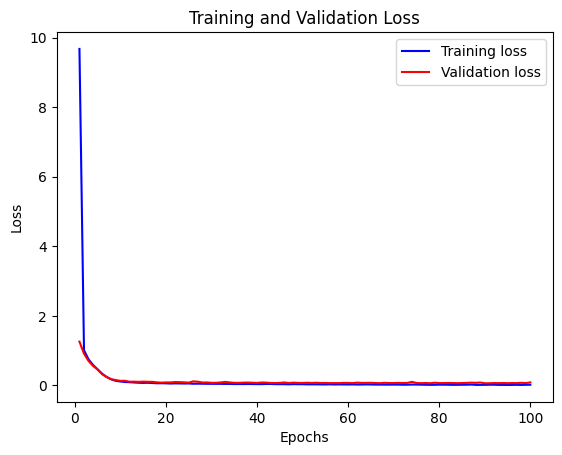

In [ ]:
# Get the training loss and validation loss from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

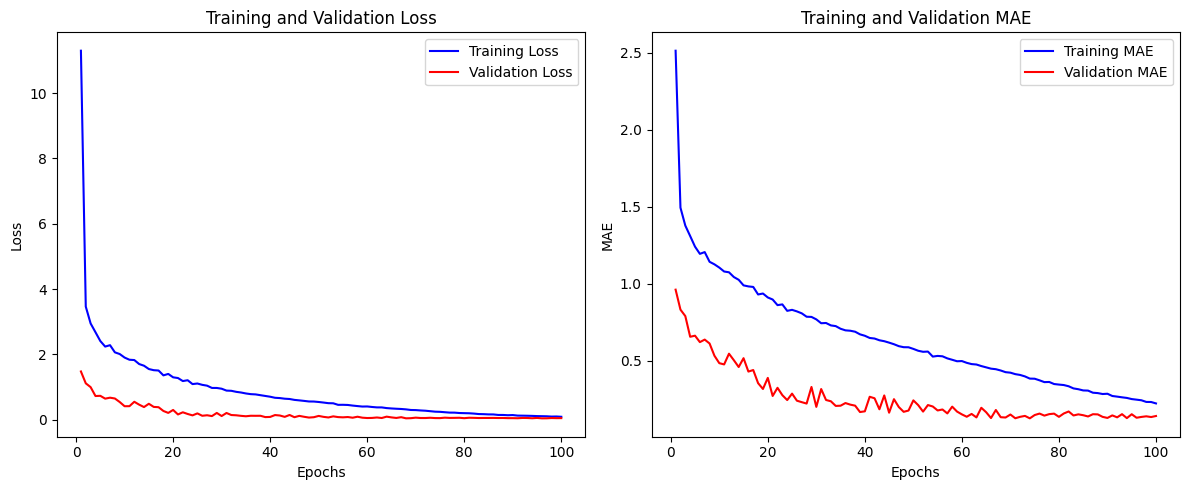

In [ ]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
prediction_test = model.predict(X_test_scaled)
print(r2_score(y_test, prediction_test))

86/86 [==============================] - 0s 2ms/step
0.8797156020375257


In [ ]:
new_data = X_test[0:5]

scaled_single_data = scaler.fit_transform(new_data)


In [ ]:
new_data

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size
708,74585,106,1,49,0,1,218.598065,1,0,0,3,1,1,0,1,1,0,3,1
47,23218,71,7,10,0,4,447.793440,3,0,0,3,1,0,1,2,3,0,5,1
3995,94903,94,3,38,0,1,451.200000,3,1,1,1,1,0,1,1,1,0,5,2
1513,77153,99,3,27,1,5,355.641958,1,0,1,1,1,0,2,1,0,1,0,1
3686,23769,69,18,14,0,2,470.097411,4,0,0,3,0,0,1,0,0,1,0,1


In [ ]:
scaled_single_data

array([[ 0.5356776 ,  1.21021767, -0.88252261,  1.4689268 , -0.5       ,
        -0.98473193, -1.8118758 , -1.16666667, -0.5       , -0.81649658,
         0.81649658,  0.5       ,  2.        , -1.58113883,  0.        ,
         0.        , -0.81649658,  0.17817416, -0.5       ],
       [-1.19932822, -1.117124  ,  0.09805807, -1.20808933, -0.5       ,
         0.86164044,  0.62993151,  0.5       , -0.5       , -0.81649658,
         0.81649658,  0.5       , -0.5       ,  0.        ,  1.58113883,
         1.82574186, -0.81649658,  1.06904497, -0.5       ],
       [ 1.22195183,  0.41227195, -0.55566238,  0.71387097, -0.5       ,
        -0.98473193,  0.6662244 ,  0.5       ,  2.        ,  1.22474487,
        -1.22474487,  0.5       , -0.5       ,  0.        ,  0.        ,
         0.        , -0.81649658,  1.06904497,  2.        ],
       [ 0.62241607,  0.74474934, -0.55566238, -0.04118486,  2.        ,
         1.47709789, -0.35183421, -1.16666667, -0.5       ,  1.22474487,
        -1.224

In [ ]:
# new_data = X_train[0:1]
predictions = model.predict(new_data)

print(predictions)

1/1 [==============================] - 0s 118ms/step
[[ 982.9602 ]
 [ 315.59814]
 [1244.8881 ]
 [1014.75   ]
 [ 322.91406]]


In [ ]:
np.exp(y_test[0:5])


708     4222.631209
47      5514.344018
3995    3808.122147
1513    7914.823110
3686    7931.722181
Name: customer_lifetime_value, dtype: float64

In [ ]:
normal_data = np.exp(y_train[1])

In [ ]:
normal_data

6979.535903

In [ ]:
new_data = X_train[0:1]

In [ ]:
new_data

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size
434,48567,130,12,15,0,1,624.0,4,1,1,0,1,0,1,2,1,0,3,1


We go ahead with the Random Forest Regressor model without any Hyperparameter Tuning as it gives the best accuracy and better computation efficiency